# Beginner R Tutorial: Exploratory Data Analysis with UCBAdmission1973

Dataset

Jianyuan(Andy) Hu  
2024-06-08

# What Is R?

R is ‘GNU S’, a freely available language and environment for
statistical computing and graphics which provides a wide variety of
statistical and graphical techniques: linear and nonlinear modelling,
statistical tests, time series analysis, classification, clustering,
etc. Please consult the R project homepage for further information.
(https://cran.r-project.org/)

# What Is This File?

This file is natively available as an html file, in other words, you
should be able to open it with any modern internet browser. You won’t be
able to execute any R code in the browser, but all outputs are already
available to you in this document.

To create this file, I used something called [Quarto Markdown
Document](https://quarto.org/). When you execute code within the
notebook, the results appear beneath the code. Quarto is an open-source
scientific and technical publishing system. It allows to embed codes and
outputs in the same document, fantastic for researchers, scholars and
educators!

# What Are We Accomplishing Here?

In Microsoft Excel, we can perform a series of data manipulation,
exploration and visualization tasks. As a bonus and complement, this is
to provide some additional exposure to one of the most popular and
powerful statistical and graphical solutions, yet **COMPLETELY FREE**,
called R! We will doing a few tasks that resemble PivotTable functions
and visualize some datapoints just like what we can accomplished with
Microsoft Excel, but using R.

# Performing Tasks with R Using UCBAdmission Dataset

## Background

**Name of the dataset:** UCBAdmission

**Description:** Aggregate data on applicants to graduate school at
Berkeley for the six largest departments in 1973 classified by admission
and sex.

**Detailed information**: https://rdrr.io/r/datasets/UCBAdmissions.html

**The official study:** [Sex Bias in Graduate Admissions: Data from
Berkeley](https://sct-prv.uab.cat/estadistica/sites/sct-prv.uab.cat.estadistica/files/3_2_Berkeley_sexBias_articleaScience.pdf)

## Import libraries

Thousands of available libraries are what make R powerful. They are
voluntarily developed by enthusiasts in the R community and you guessed
it, there are many many many…. many of them. Consider libraries are
different add-ons that you can plug-in to your workflow to get things
done faster. And yes! These libraries are free, as well!!….

**If a library is never used on the computer before**, you do need to
install it first and it is super easy to do with one line of code in R.
For example:

In [ ]:
#install.packages("janitor") #btw, I don't really know why it is called "janitor", probably a good data cleaning tool??...

After that you can just call it when you need it. I have many installed
already, so I will just call all the ones needed for this tutorial.
However, if you have not already installed these libraries, be sure to
install them first.

In [ ]:
library(janitor)
library(tidyverse)
library(ggplot2)
library(rpivotTable)

## Import data

In R environment, there are many illustrative datasets built in
UCBAdmission is one of them.

To import data into a tabular format, called “data frame”. In
particular, we will use a “flavour” of data frame called “tibble”.

Every time when you use “\<-” to point at something (in this case “df”),
that will refer to the object you assign it to. The following command
allows “df” to refer to the tibble dataframe that we just created from
UCBAdmissions built-in dataset.

In [ ]:
df <- as_tibble(UCBAdmissions)

## Explore data

To see a few of top records.

In [ ]:
head(df)

# A tibble: 6 × 4
  Admit    Gender Dept      n
  <chr>    <chr>  <chr> <dbl>
1 Admitted Male   A       512
2 Rejected Male   A       313
3 Admitted Female A        89
4 Rejected Female A        19
5 Admitted Male   B       353
6 Rejected Male   B       207

To see the structure of data frame:

In [ ]:
str(df)

tibble [24 × 4] (S3: tbl_df/tbl/data.frame)
 $ Admit : chr [1:24] "Admitted" "Rejected" "Admitted" "Rejected" ...
 $ Gender: chr [1:24] "Male" "Male" "Female" "Female" ...
 $ Dept  : chr [1:24] "A" "A" "A" "A" ...
 $ n     : num [1:24] 512 313 89 19 353 207 17 8 120 205 ...

To view the entire data frame, just run the object itself

In [ ]:
df

# A tibble: 24 × 4
   Admit    Gender Dept      n
   <chr>    <chr>  <chr> <dbl>
 1 Admitted Male   A       512
 2 Rejected Male   A       313
 3 Admitted Female A        89
 4 Rejected Female A        19
 5 Admitted Male   B       353
 6 Rejected Male   B       207
 7 Admitted Female B        17
 8 Rejected Female B         8
 9 Admitted Male   C       120
10 Rejected Male   C       205
# ℹ 14 more rows

### Create frequency and relative frequency tables

To create frequency tables by Gender and Admit. We will leverage the
powerful and comprehensive data cleaning library called
[tidyverse](https://www.tidyverse.org/). In fact, tidyverse is a
collection library of a bunch of other libraries.

**Note:** “\|\>” is called “pipe operator”. You might also have seen a
variant of pipe operator like this “%\>%”. This operator allows the
evaluated object from the current function(s) to be passed down as an
input to a parameter of the next function. This is one of the great
creations in R and really enables to simplify the codes and make the
codes more readable. If you would like to read more about pipe operators
in R, this is an excellent start: [Pipelines in
R](https://research.sbcs.qmul.ac.uk/r.knell/intro_R_3rd_ed/pipelines-in-r.html).

For example, the following code can be interpreted like this in a more
human English way:

-   line 1: we would like to create a new object called
    admit_gender_pivot, starting with df object (keep in mind that “df”
    is the same tibble dataframe we just created above)
-   line 2: and then, df will be grouped by “Admit” and “Gender” columns
-   line 3: and then, the grouped df will be summarized to a new metric
    (column) called “Freg_Agg”, which is to sum of values in “n” column,
    and we will keep the grouping
-   line 4: and then, ungroup the summarized tibble dataframe
-   line 5: and finally, pivot the dataframe from line 4 to be a wider
    dataframe, by using the values in “Admit” column to be the new
    column names and aggregate values from “Freq_Agg” column.

In [ ]:
admit_gender_pivot <- df |>  
  group_by(Admit, Gender)  |>  
  summarise(Freq_Agg = sum(n),  .groups = "keep") |>
  ungroup() |> 
  pivot_wider(names_from = Admit, values_from = Freq_Agg)

admit_gender_pivot

# A tibble: 2 × 3
  Gender Admitted Rejected
  <chr>     <dbl>    <dbl>
1 Female      557     1278
2 Male       1198     1493

To add totals, row/column titles, we use a function called
“adorn_totals”, from a library called
[janitor](https://www.rdocumentation.org/packages/janitor/versions/2.2.0),
an excellent collection of helper tools to “clean up” the tables.

In [ ]:
admit_gender_pivot_full <- admit_gender_pivot |> 
  adorn_totals(where = c("row", "col")) |> 
  # add as_tibble to enforce the output of adorn_totals to be tibble again
  as_tibble()
admit_gender_pivot_full

# A tibble: 3 × 4
  Gender Admitted Rejected Total
  <chr>     <dbl>    <dbl> <dbl>
1 Female      557     1278  1835
2 Male       1198     1493  2691
3 Total      1755     2771  4526

To see % of admission to gender total by each gender:

In [ ]:
admit_gender_pivot_pct <- admit_gender_pivot |> 
  adorn_percentages("row") |> 
  # to round percentages decimal places to 2 places
  adorn_pct_formatting(digits = 2) |> 
  as_tibble()
admit_gender_pivot_pct

# A tibble: 2 × 3
  Gender Admitted Rejected
  <chr>  <chr>    <chr>   
1 Female 30.35%   69.65%  
2 Male   44.52%   55.48%  

### Create bar plots for the relative frequency table

We start by creating an unpivoted (longer) relative frequency table.
Essentially, this is the opposite of “pivot_wider”, as we will make the
admission results headers to be a column by itself (Admit) and the
measure (relative frequencies) will become its own column as well
(Rel_Freq).

In [ ]:
admit_gender_pct <- admit_gender_pivot_pct |> 
  pivot_longer(cols = c(Admitted, Rejected), names_to = "Admit", values_to = "Rel_Freq")
admit_gender_pct

# A tibble: 4 × 3
  Gender Admit    Rel_Freq
  <chr>  <chr>    <chr>   
1 Female Admitted 30.35%  
2 Female Rejected 69.65%  
3 Male   Admitted 44.52%  
4 Male   Rejected 55.48%  

Another great creation in R is a comprehensive graphics library
[ggplot2](https://ggplot2.tidyverse.org/), based on [Layered Grammar of
grahics](https://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf).
It truly is powerful enough that it allows you to create any type of
grahics, only limited by your imagination. We will use this exercise to
build the basics of this grammar and ggplot2 package.

I hope by this point, you really appreciate what makes R so powerful are
these thoughtfully curated libraries that can just “plug and play”.

There are layers when graphing with ggplot libaray.

The beginning layer is to create the canvas and then the 2nd layer is to
assign each axis. You won’t be able to see Gender yet, because that will
be shown as different colors the graphic is actually made and we haven’t
told what graphics we want to create yet. So, patience, my friends.

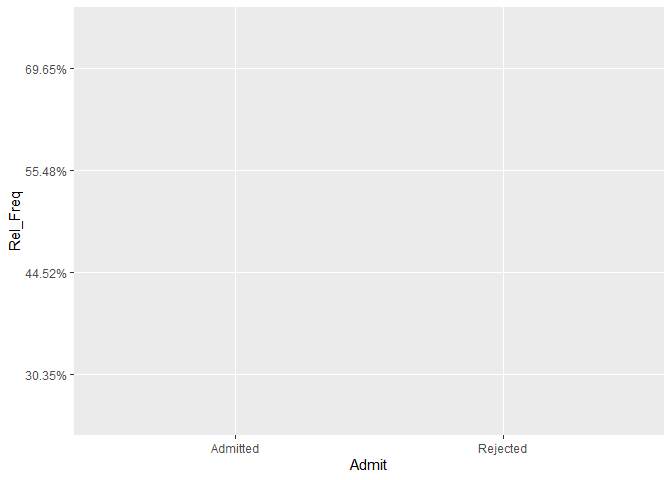

In [ ]:
ggplot(admit_gender_pct, mapping = aes(x=Admit, y=Rel_Freq, fill=Gender))

3rd layer is to plot the barplot for relative frequency. Now, with
geom_bar, we are telling R to create a bar chart, and you will see

**Note:** the “+” sign functions just like ” \|\> “, an operator to
connect from one function to another within ggplot2 library. Just a
weird dialect specifically spoken mandated by ggplot2 creators if you
will.

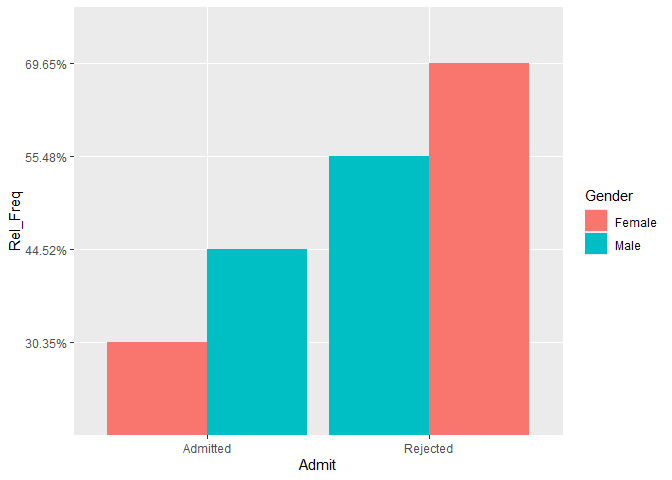

In [ ]:
ggplot(admit_gender_pct, mapping = aes(x=Admit, y=Rel_Freq, fill=Gender))+
  # stat="identity" means we want to use the data values just as they are without being summarized other ways
  # position allows to specify different types of bars (stacked, dodged etc...)
  geom_bar(stat="identity", position = 'dodge')

To demo manually change category colours, we can use “scale_fill_manual”

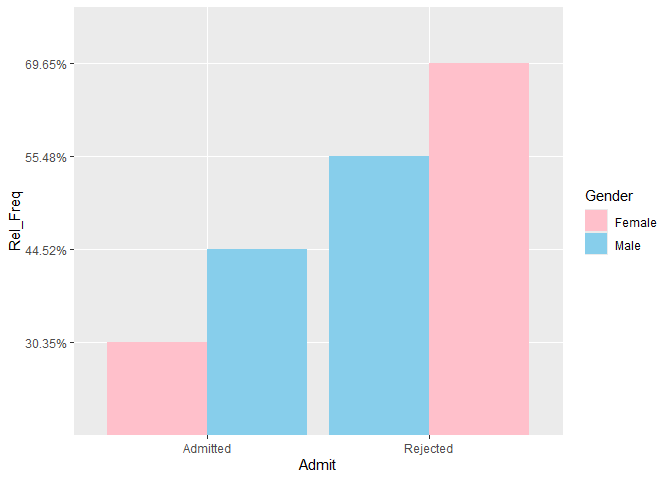

In [ ]:
ggplot(admit_gender_pct, mapping = aes(x=Admit, y=Rel_Freq, fill=Gender))+
  geom_bar(stat="identity", position = 'dodge')+
  scale_fill_manual(values = c("Female" = "pink", "Male" = "skyblue"))

To add title for the barplot

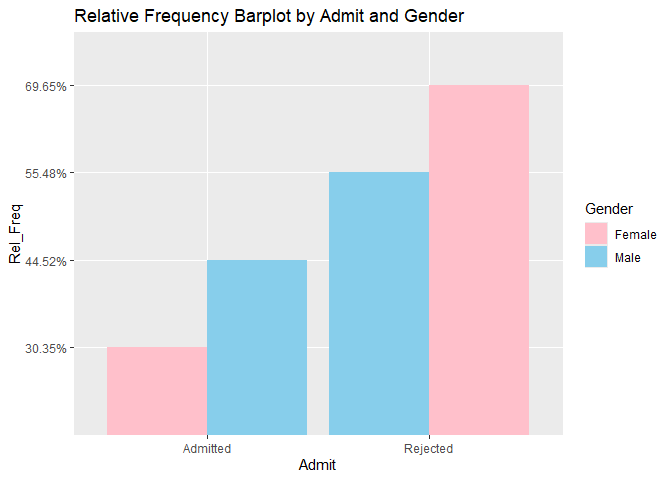

In [ ]:
ggplot(admit_gender_pct, mapping = aes(x=Admit, y=Rel_Freq, fill=Gender))+
  geom_bar(stat="identity", position = 'dodge')+
  scale_fill_manual(values = c("Female" = "pink", "Male" = "skyblue"))+
  ggtitle("Relative Frequency Barplot by Admit and Gender")

To add data labels to each bar:

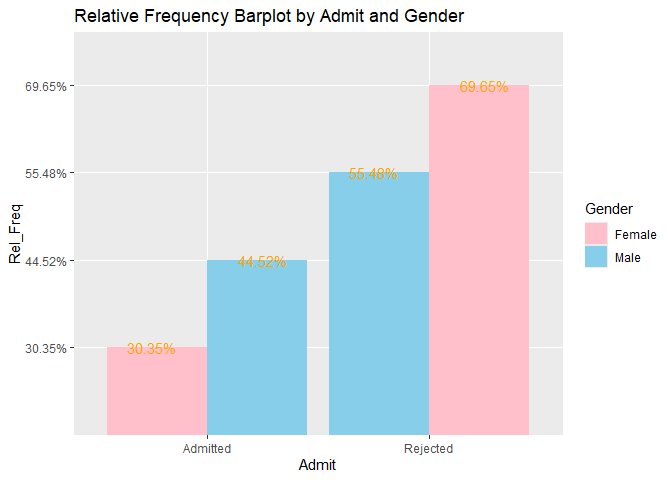

In [ ]:
ggplot(admit_gender_pct, mapping = aes(x=Admit, y=Rel_Freq, fill=Gender))+
  geom_bar(stat="identity", position = 'dodge')+
  geom_text(aes(label = Rel_Freq), colour = "orange", position = position_dodge(width = 1), )+
  scale_fill_manual(values = c("Female" = "pink", "Male" = "skyblue"))+
  ggtitle("Relative Frequency Barplot by Admit and Gender")

### Create relative frequency tables for each department

We repeat what we have done in “creating frequency and relative
frequency table” section, but for each of the department

We will make an example with department A first:

In [ ]:
admit_gender_pivot_DpetA <- df|> 
  filter(Dept=="A") |> 
  group_by(Admit, Gender) |>  
  summarise(Freq_Agg = sum(n), .groups = "keep") |>  
  pivot_wider(names_from = Admit, values_from = Freq_Agg)
admit_gender_pivot_DpetA

# A tibble: 2 × 3
# Groups:   Gender [2]
  Gender Admitted Rejected
  <chr>     <dbl>    <dbl>
1 Female       89       19
2 Male        512      313

Then similar to above, we will get relative frequencies.

In [ ]:
admit_gender_pivot_DpetA |> 
  adorn_percentages("row") |> 
  adorn_pct_formatting(digits = 2) |>  
  as_tibble()

# A tibble: 2 × 3
  Gender Admitted Rejected
  <chr>  <chr>    <chr>   
1 Female 82.41%   17.59%  
2 Male   62.06%   37.94%  

If you think about it, we are really are just repeating these steps
above for each department for each of the filtered subset. This is where
we have to ask ourselves, ***“we are programming anyways, can we
automate things?”***

Usually, when this question rises, the answer is “yes”!, so let’s put
our thinking hat on.

-   We want to “bundle” all of the data transform steps because they are
    consistent across all departments. We call this “bundle” a
    “function”, something that takes a input and returns an output. In
    fact, all of the things that you have seen thus far, like “filter”,
    ” group_by”, “summarize” etc… they are all functions! It’s that this
    time, we are writing a custome one ourselves.

-   We want to parameterize for different department values wherever we
    need to call out for that particular department. This really just a
    list of department values.

-   We “map” each department value as input to the same function, and
    then let the computer walk through the entire parameter series.

Okay, enough all this talk, let’s see that in action!

First, we need to create the function that does all of the data
transformation and creating graphics. It sounds a lot, but we actually
have all of the steps figured out, we just need to wrap them all in a
function.

In [ ]:
# we are creating a function called create_dept_relative_freq, which takes an input called "dept"
create_dept_relative_freq <- function(dept){
  
  admit_gender_pivot_Dpet <- df |> 
    # this is where the "parameterize concept is applied, if we pass dept == "A" to this function, it will filter for just Dept A related rows, neat!!!
    filter(Dept==dept) |> 
    # all of the following steps you have seen above, no surprises here
    group_by(Admit, Gender) |>  
    summarise(Freq_Agg = sum(n), .groups = "keep")|> 
    pivot_wider(names_from = Admit, values_from = Freq_Agg)|> 
    adorn_percentages("row") |> 
    adorn_pct_formatting(digits = 2)|> 
    as_tibble()
  
  # return specifies what output you would this function to yield. In this case, we would like to have the tranformed data frame of course...
  return(admit_gender_pivot_Dpet)
}

To get a list (vector) of departments, we can get “distinct” values from
Dept column and then “pull”. All of these are courtesy of “tidyverse”.

In [ ]:
dept_list <- df |> 
  distinct(Dept) |> 
  pull()
dept_list

[1] "A" "B" "C" "D" "E" "F"

Now, we need to have a mechanism to let R walk through all values in
dept_list and pass each value to the same function. Once, again,
courtesy of “tidyverse”, a function called “map” will take care of this
for us… We will just chill and wait for the data frames!

**Note:** “~create_dept_relative_freq(.x)” means that we are taking each
value found in dept_list object and pass them individually one after
another to run the function create_dept_relative_freq. “.x” is simply
the parameter placeholder for “dept” which represents one of “A”, “B”,
“C”….

In [ ]:
map(dept_list, ~create_dept_relative_freq(.x))

[[1]]
# A tibble: 2 × 3
  Gender Admitted Rejected
  <chr>  <chr>    <chr>   
1 Female 82.41%   17.59%  
2 Male   62.06%   37.94%  

[[2]]
# A tibble: 2 × 3
  Gender Admitted Rejected
  <chr>  <chr>    <chr>   
1 Female 68.00%   32.00%  
2 Male   63.04%   36.96%  

[[3]]
# A tibble: 2 × 3
  Gender Admitted Rejected
  <chr>  <chr>    <chr>   
1 Female 34.06%   65.94%  
2 Male   36.92%   63.08%  

[[4]]
# A tibble: 2 × 3
  Gender Admitted Rejected
  <chr>  <chr>    <chr>   
1 Female 34.93%   65.07%  
2 Male   33.09%   66.91%  

[[5]]
# A tibble: 2 × 3
  Gender Admitted Rejected
  <chr>  <chr>    <chr>   
1 Female 23.92%   76.08%  
2 Male   27.75%   72.25%  

[[6]]
# A tibble: 2 × 3
  Gender Admitted Rejected
  <chr>  <chr>    <chr>   
1 Female 7.04%    92.96%  
2 Male   5.90%    94.10%  

How neat!!!

### Create a series of barplot for relative frequencies of admission by gender given a department

Okay, now you have a bit taste of creating relative frequencies for each
department, you probably wonder: since we are creating the similar
graphic grammar for all of the barplots, can we extend our function so
that it is capable of creating graphics as well?

You betcha!!

[[1]]

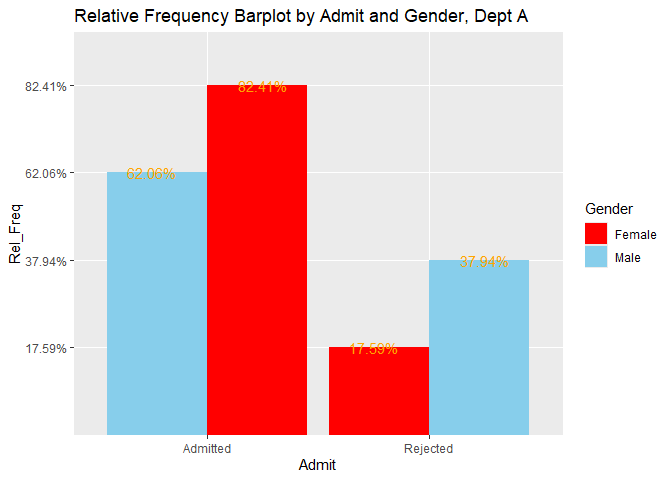


[[2]]

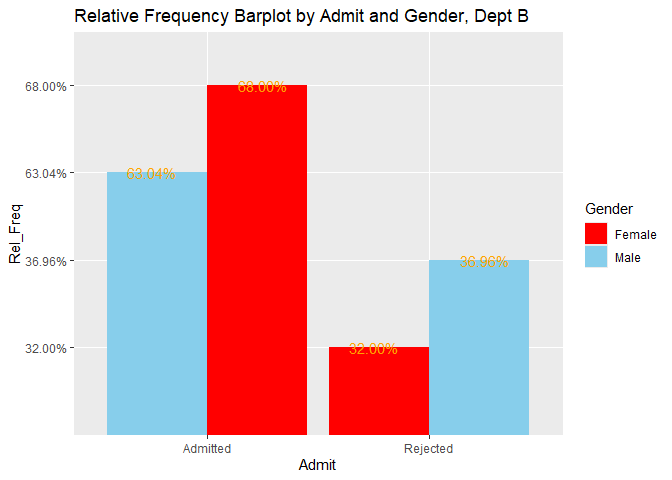


[[3]]

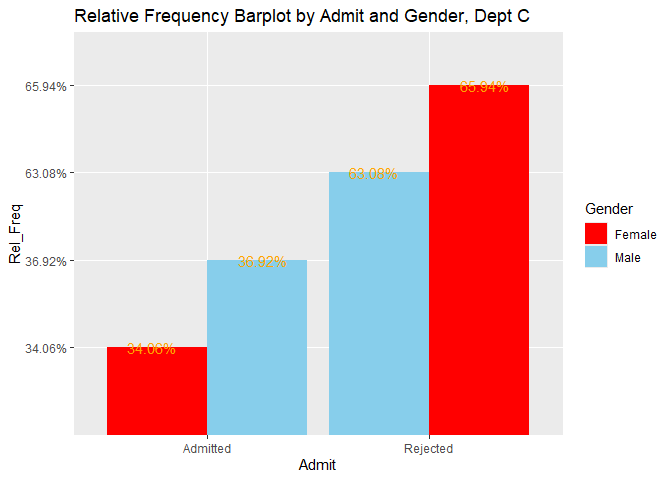


[[4]]

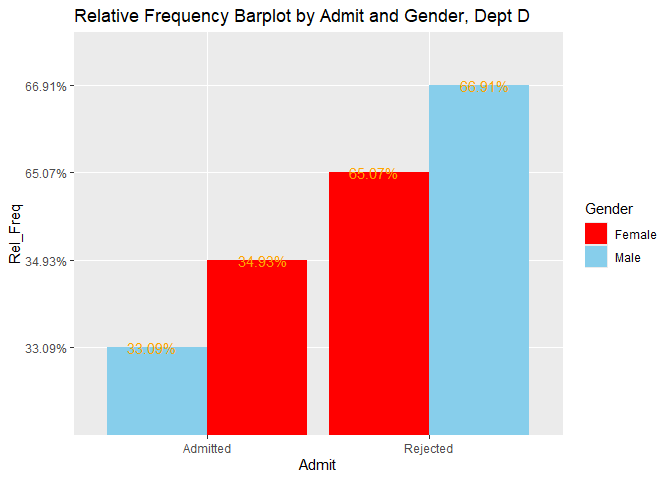


[[5]]

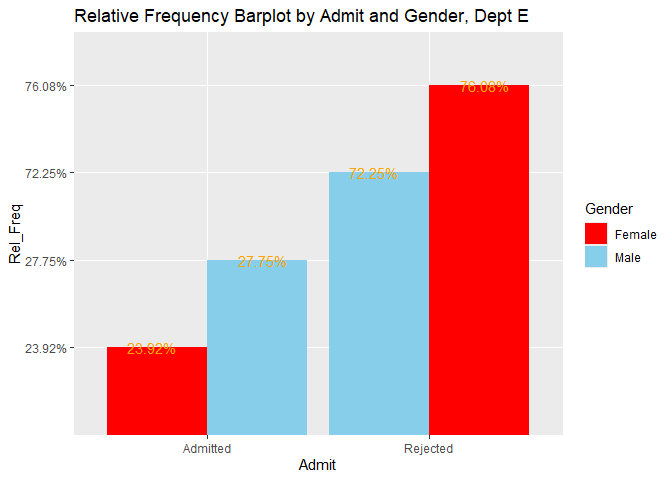


[[6]]

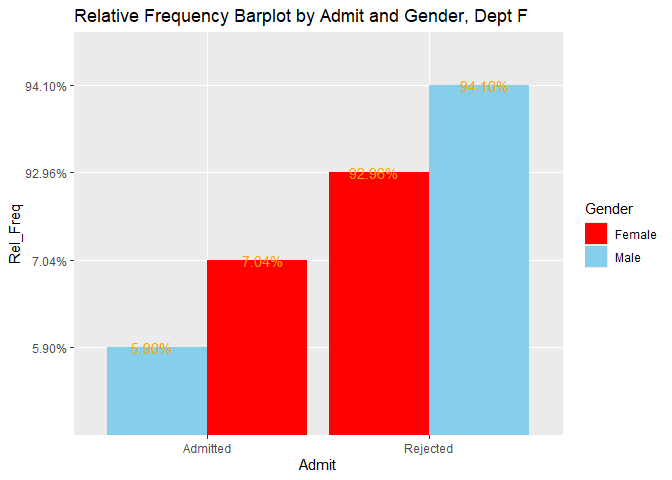

In [ ]:
# we are creating a function called create_dept_relative_freq, which takes an input called "dept"
create_dept_admit_relative_freq_bar <- function(dept){
  # this part is exactly like what we have in create_dept_relative_freq function
  admit_gender_barplot <- df |> 
    filter(Dept==dept) |> 
    # all of the following steps you have seen above, no surprises here
    group_by(Admit, Gender) |>  
    summarise(Freq_Agg = sum(n), .groups = "keep") |>  
    pivot_wider(names_from = Admit, values_from = Freq_Agg) |>  
    adorn_percentages("row") |> 
    adorn_pct_formatting(digits = 2) |>  
    as_tibble() |> 
    pivot_longer(cols = c(Admitted, Rejected), names_to = "Admit", values_to = "Rel_Freq") |> 
    # and now we are stitching with the ggplot portion for that barplot
    ggplot(mapping = aes(x=Admit, y=Rel_Freq, fill=Gender))+
    geom_bar(stat="identity", position = 'dodge')+
    geom_text(aes(label = Rel_Freq), colour = "orange", position = position_dodge(width = 1), )+
    scale_fill_manual(values = c("Female" = "red", "Male" = "skyblue"))+
    # "paste" function allows us to dynamically generate the title for the barplot. Think of it as some kind of magic glue that stick a variable or many variables after a fixed text value.
    ggtitle(paste("Relative Frequency Barplot by Admit and Gender, Dept", dept))
  
  # return specifies what output you would this function to yield. In this case, we would like to have the tranformed data frame of course...
  return(admit_gender_barplot)
}

map(dept_list, create_dept_admit_relative_freq_bar)

### A much much fancier way to achieve the same:

This part is interesting: the relative frequency that we are seeking is
each Freq out of **total applicants of a particular gender to a
particular Dept**. Therefore, to get this subtotal in R, like before, we
use “group_by” function from “tidyverse” library to find proper
granularity level that we need. Then, we can simply use function called
“mutate” (also from “tidyverse”) to get all of the relative frequencies
that we need, by passing all of the summarize and pivot wider/longer
process. **“mutate”** is just a go-to function to modify a tibble
dataframe, such as changing values, adding a new column etc…

In this case, we need to group Dept and Gender.

In [ ]:
df_subtotal <- df |>  
  group_by(Dept, Gender) |> 
  # we are creating a new column called "Freq_subtotal"
  mutate(Freq_subtotal = sum(n)) |> 
  ungroup()

head(df_subtotal, 10)

# A tibble: 10 × 5
   Admit    Gender Dept      n Freq_subtotal
   <chr>    <chr>  <chr> <dbl>         <dbl>
 1 Admitted Male   A       512           825
 2 Rejected Male   A       313           825
 3 Admitted Female A        89           108
 4 Rejected Female A        19           108
 5 Admitted Male   B       353           560
 6 Rejected Male   B       207           560
 7 Admitted Female B        17            25
 8 Rejected Female B         8            25
 9 Admitted Male   C       120           325
10 Rejected Male   C       205           325

One more inch to go to create the Rel_Freq itself

In [ ]:
df_rf <- df_subtotal %>% 
  group_by(Dept, Gender) |> 
  # we are creating a new column called "Freq_subtotal", notice how group_by enables to create the same subtotals as long as the values are the same for Dept and Gender, but not the same by Admit values
  mutate(
    Freq_subtotal = sum(n), 
    # we are creating the relative frequency column and round the decimal places to 4 decimal places
    Rel_Freq = round(n/Freq_subtotal, digits = 4)
    ) |> 
  ungroup()

head(df_rf)

# A tibble: 6 × 6
  Admit    Gender Dept      n Freq_subtotal Rel_Freq
  <chr>    <chr>  <chr> <dbl>         <dbl>    <dbl>
1 Admitted Male   A       512           825    0.621
2 Rejected Male   A       313           825    0.379
3 Admitted Female A        89           108    0.824
4 Rejected Female A        19           108    0.176
5 Admitted Male   B       353           560    0.630
6 Rejected Male   B       207           560    0.370

I will also introduce a “fancy grammar” enabled from ggplot2, called
“facet”. “facet” allows to create same graphics by distinct values of a
data dimension and fit them all in the same graphic, instead of multiple
individual graphics. This is a perfect use case for our scenario and
enables to view all 6 departments side by side. I hope you get sense of
the powerful graphic capability from R, particularly from ggplot2. This
is something basic data analysis tool like Microsoft Excel not capable
of easily accomplish.

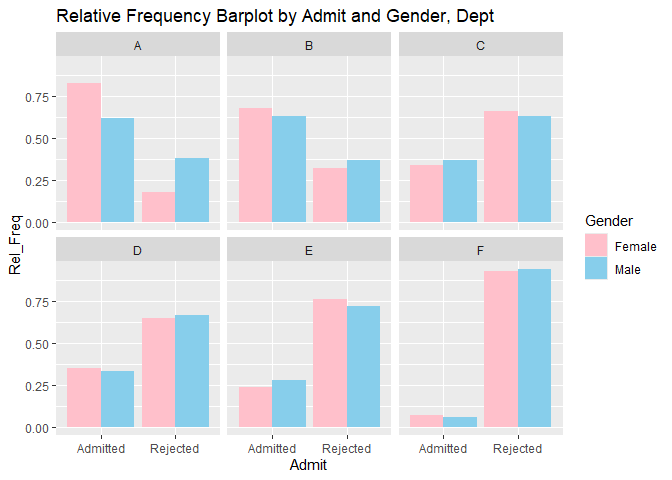

In [ ]:
ggplot(df_rf, mapping = aes(x=Admit, y=Rel_Freq, fill=Gender))+
  geom_bar(stat="identity", position = "dodge")+
  scale_fill_manual(values = c("Female" = "pink", "Male" = "skyblue"))+
  facet_wrap(~ Dept)+
  ggtitle("Relative Frequency Barplot by Admit and Gender, Dept")

# Closing

**That’s it for this session… I hope you enjoy the content the same as
much as I write it. Have a great day!!!**